In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Importacion (Gasolina superior, Gasolina regular, Diesel)

In [52]:
file_path = "./data/CSV/importacion.csv"
df = pd.read_csv(file_path)

In [53]:
df = df[pd.to_datetime(df['Fecha'], errors='coerce').notna()]
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Preprocessing para diesel alto azufre
serie_diesel = df[['Fecha', 'Diesel alto azufre']].copy()
serie_diesel.rename(columns={'Diesel alto azufre': 'Diesel'}, inplace=True)

serie_gasolina_regular = df[['Fecha', 'Gasolina regular']].set_index('Fecha')
serie_gasolina_regular = serie_gasolina_regular.asfreq('MS')  # Frecuencia mensual

serie_gasolina_superior = df[['Fecha', 'Gasolina superior']].set_index('Fecha')
serie_gasolina_superior = serie_gasolina_superior.asfreq('MS')  # Frecuencia mensual

serie_diesel.set_index('Fecha', inplace=True)
serie_diesel = serie_diesel.asfreq('MS')


KeyError: 'Fecha'

In [ ]:
print("Gasolina Regular: \n")
print("Inicio:", serie_gasolina_regular.index.min())
print("Fin:", serie_gasolina_regular.index.max())
print("Frecuencia:", pd.infer_freq(serie_gasolina_regular.index))

print("\nGasolina Superior: \n")
print("Inicio:", serie_gasolina_superior.index.min())
print("Fin:", serie_gasolina_superior.index.max())
print("Frecuencia:", pd.infer_freq(serie_gasolina_superior.index))

print("\nDiesel: \n")
print("Inicio:", serie_diesel.index.min())
print("Fin:", serie_diesel.index.max())
print("Frecuencia:", pd.infer_freq(serie_diesel.index))

Gasolina Regular: 

Inicio: 2001-01-01 00:00:00
Fin: 2024-12-01 00:00:00
Frecuencia: MS

Gasolina Superior: 

Inicio: 2001-01-01 00:00:00
Fin: 2024-12-01 00:00:00
Frecuencia: MS

Diesel: 

Inicio: 2001-01-01 00:00:00
Fin: 2024-12-01 00:00:00
Frecuencia: MS


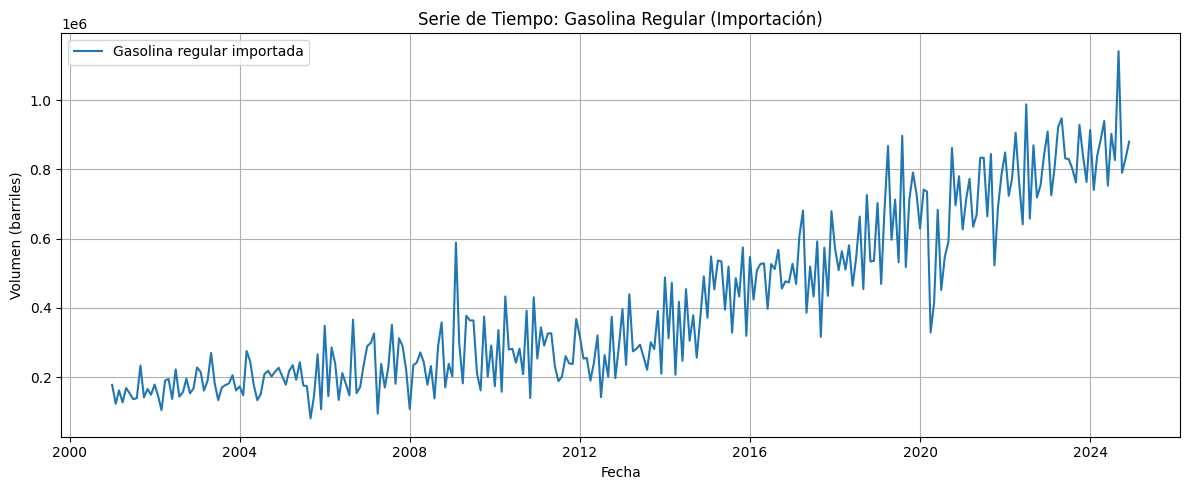

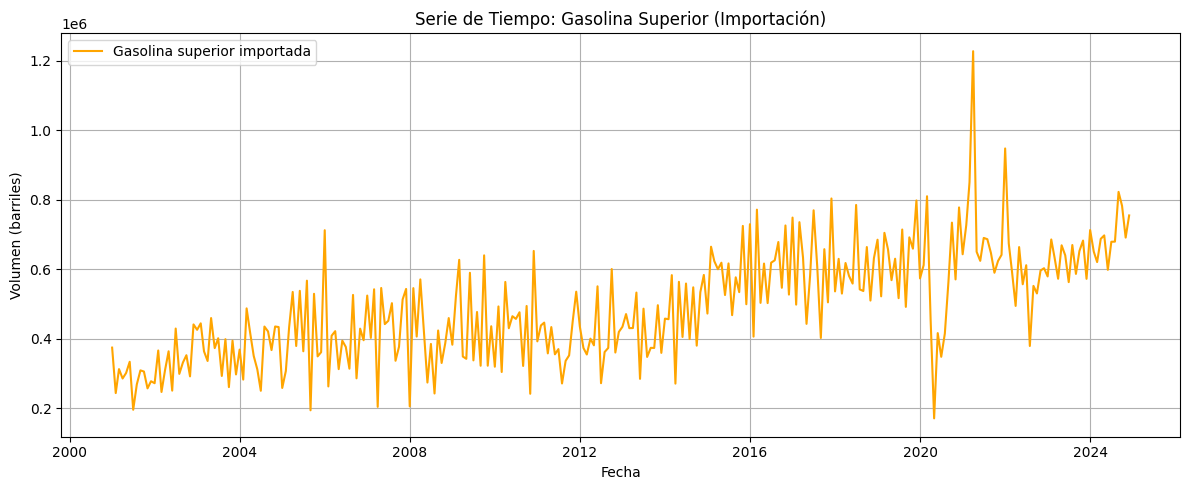

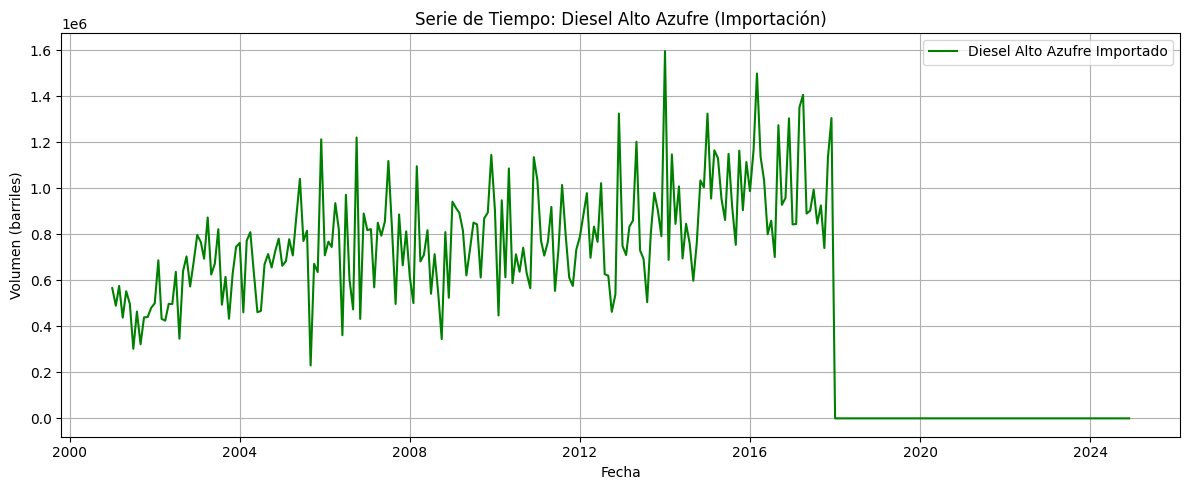

In [ ]:
# === Gráfico de la serie Gasolina regular Importada===
plt.figure(figsize=(12, 5))
plt.plot(serie_gasolina_regular, label='Gasolina regular importada')
plt.title('Serie de Tiempo: Gasolina Regular (Importación)')
plt.xlabel('Fecha')
plt.ylabel('Volumen (barriles)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# === Gráfico de la serie Gasolina superior Importada===
plt.figure(figsize=(12, 5))
plt.plot(serie_gasolina_superior, label='Gasolina superior importada', color='orange')
plt.title('Serie de Tiempo: Gasolina Superior (Importación)')
plt.xlabel('Fecha')
plt.ylabel('Volumen (barriles)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# === Gráfico de la serie Diesel ===
plt.figure(figsize=(12, 5))
plt.plot(serie_diesel, label='Diesel Alto Azufre Importado', color='green')
plt.title('Serie de Tiempo: Diesel Alto Azufre (Importación)')
plt.xlabel('Fecha')
plt.ylabel('Volumen (barriles)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Analisis Graficas

A primera vista se puede ver lo siguiente: 

Para la gasolina regular podemos ver que ha ido en un crecimiento normal, teniendo un pico aproximadamente en el 2009 en importaciones, un bajon a mediados de 2020, en general un crecimiento normal, notando que desde 2012 empezo a tener una pendiente un poco mas inclinada.

Para la gasolina superior, a comparacion de la gasolina regular, esta grafica se ve mas irregular, entre el año 2020 y 2022, se nota mucha variacion llegando a valores muy bajos y muy altos en poco tiempo. Fuera de esos años, un crecimiento bastante lento en comparacion con la gasolina regular.

Para el Diesel de alto azufre, lo que mas sobresale es que en el 2018, todo llego a 0, lo cual es poco probable, entonces nos lleva a pensar que es un error de recopilacion de data. Ademas de eso, podemos notar que a comparacion de los otros tipos de gasolina, que este empieza con un nivel de volumen mas alto. Es bastante mas irregular que las otras, aunque siempre va en crecimiento.

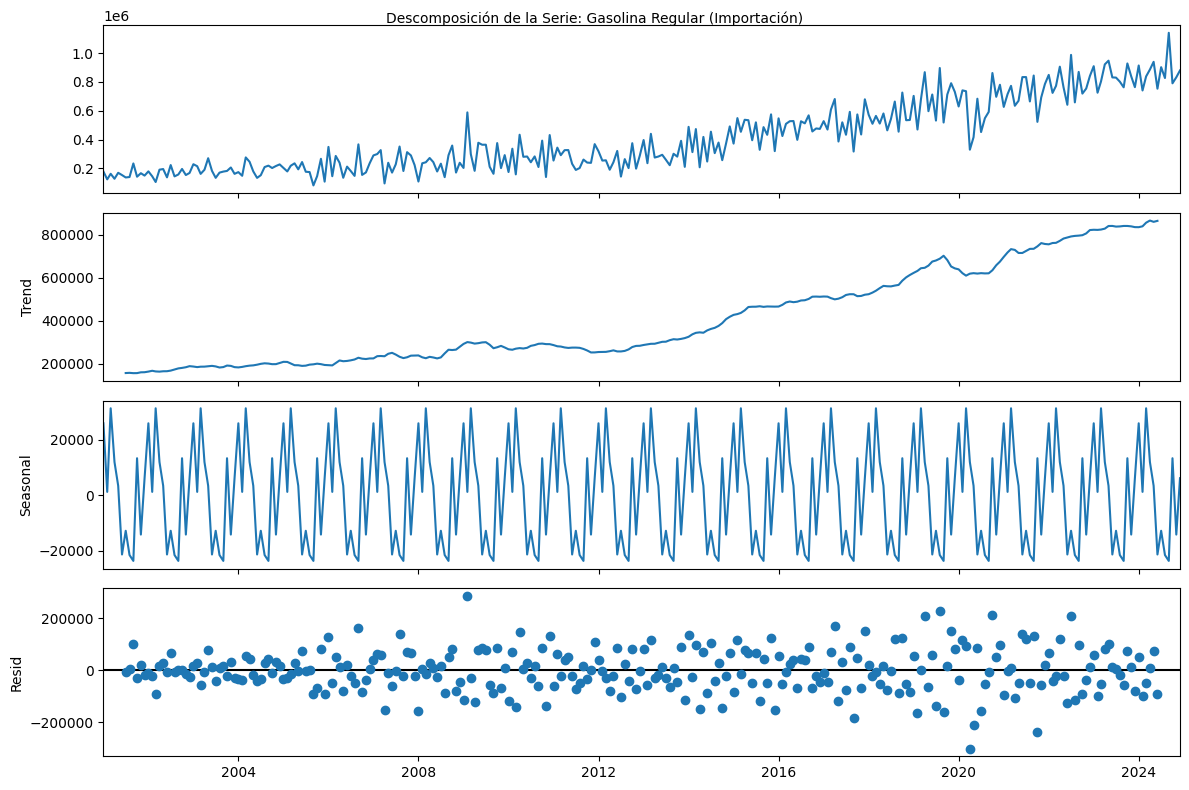

In [ ]:
regular_decompose = seasonal_decompose(serie_gasolina_regular, model='additive')

# Gráfica de los componentes
plt.rcParams.update({'figure.figsize': (12, 8)})
regular_decompose.plot()
plt.suptitle("Descomposición de la Serie: Gasolina Regular (Importación)", fontsize=10)
plt.show()

## Analisis de los componentes


##### Trend:
La componente de tendencia muestra un crecimiento sostenido en las importaciones de gasolina regular desde el año 2001 hasta alrededor de 2023. Este crecimiento no es lineal, pero sí constante en el largo plazo, con algunos períodos de desaceleración o estabilización, especialmente entre 2014 y 2016, y una caída moderada alrededor del 2020, posiblemente relacionada con la pandemia de COVID-19. El hecho de que la media de la serie se incremente a lo largo del tiempo indica que la serie no es estacionaria en media, ya que la tendencia altera la estabilidad del nivel general de la serie temporal.


##### Seasonal: 
La componente estacional refleja un patrón claro y repetitivo a lo largo de cada año. Específicamente, se observan aumentos y disminuciones regulares con la misma estructura mes a mes, lo que indica una estacionalidad mensual fuerte. Este comportamiento sugiere que las importaciones de gasolina regular siguen un patrón cíclico anual, probablemente vinculado al consumo estacional, vacaciones, actividades económicas o políticas de abastecimiento. La estacionalidad se mantiene bastante constante en amplitud, lo cual es útil para modelar y prever el comportamiento futuro.


##### Resid: 
Los residuos, es decir, la parte no explicada por la tendencia ni la estacionalidad, parecen oscilar alrededor de cero y no muestran una tendencia visible ni cambios significativos en su dispersión a lo largo del tiempo. Esto sugiere que los residuos son ruido aleatorio con varianza aproximadamente constante, lo cual es un buen indicio para modelar. Aunque se observan algunos puntos atípicos (especialmente entre 2020 y 2021), no hay una evidencia clara de que la varianza cambie sistemáticamente, por lo que se puede decir que la serie es aproximadamente estacionaria en varianza.